In [2]:
using Pkg
Pkg.activate("..")
using ElementalFunctionsTests

  Activating project at `~/Documents/Academia/taylor/ElementalFunctionsTests`


In [3]:
using JSON
import Unmarshal
using Plots
using Printf
include("setupPlots.jl")

setupLabels (generic function with 1 method)

In [137]:
f_c = @cfunction(exp10, Cfloat, (Cfloat,))
f_mpfr = mpfrfun(string(exp10))
ulperror(f_c, f_mpfr, -0x1.c418c6485a53bp+12)
JSON.string(ulperror(f_c, f_mpfr, -0x1.c418c6485a53bp+12))

0.000000
1.06e-314 == 0.000000 = 0x1.fep-1044
ret=0
0.000000
1.06e-314 == 0.000000 = 0x1.fep-1044
ret=0


"-2.1390950400000002e9"

In [4]:
function inrange(x, a=-Inf, b=Inf)
    return a < x ≤ b
end

inrange (generic function with 3 methods)

In [5]:
function filterResults(errors, a, b)
    return filter((x)->inrange(abs(x.maxError.err),a, b), errors)
end

filterResults (generic function with 1 method)

# Float64

In [6]:
Unmarshal.unmarshal(T::Type{ElementalFunctionsTests.AbstractError}, x::Error, verbose::Bool, verboseLvl::Int64) = x
Unmarshal.unmarshal(T::Type{StepRangeLen}, br::Vector{Any}, verbose::Bool, verboseLvl::Int64) =  range(first(br), last(br), length=length(br))
function Unmarshal.unmarshal(DT::Type{ElementalFunctionsTests.AbstractError}, parsedJson::Dict{String, Any}, verbose::Bool, verboseLvl::Int64)
    parsedJson["x"] = eval(Meta.parse(parsedJson["x"])) 
    return Unmarshal.unmarshal(Error, parsedJson)
end

### Distribución de números flotantes

In [216]:
RFD = JSON.parsefile("Float64Errors_FloatDistribution.json")
RFD = Unmarshal.unmarshal(Array{TestsResults}, RFD)
nothing

In [8]:
default(size=(900,900))

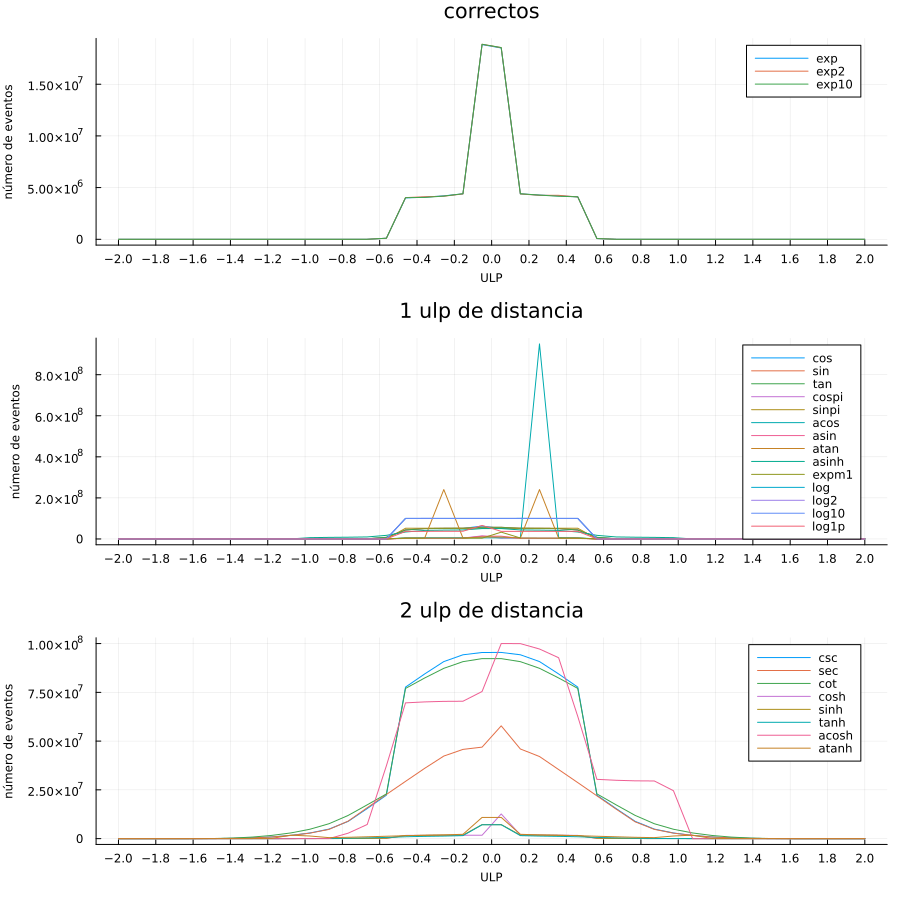

In [38]:
correct = filterResults(RFD, prevfloat(0.0), 0.5)
ulp1 = filterResults(RFD, 0.5, 1.5)
ulp2 = filterResults(RFD, 1.5, 2.5)
r =  range(-2, 2, length=40)
l = @layout [a ; b ; c]
p1 = plot(r, setupBuckets(correct), label=setupLabels(correct), guidefont=font(8))
title!("correctos")
p2 = plot(r, setupBuckets(ulp1), label=setupLabels(ulp1), guidefont=font(8))
title!("1 ulp de distancia")
p3 = plot(r, setupBuckets(ulp2), label=setupLabels(ulp2), guidefont=font(8))
title!("2 ulp de distancia")
plot(p1, p2, p3, layout = l, xticks = -2:0.2:2, size=(900,900))
xlabel!("ULP")
ylabel!("número de eventos")
# savefig("hist_RFD")

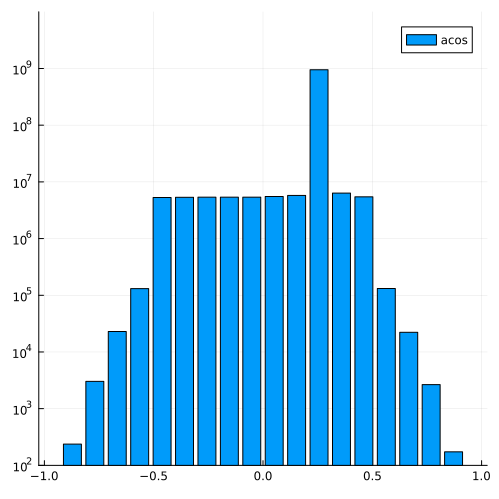

In [235]:
lupa = 12:29 
bar(r[lupa], RFD[6].buckets[lupa], yscale=:log10, yticks=exp10.(1:9), ylims=(100, 10^10), size=(500,500), label="acos")
savefig("acos_RFD")
bar(r[lupa], RFD[6].buckets[lupa], yscale=:log10, yticks=exp10.(1:9), ylims=(100, 10^10), size=(500,500), label="acos")

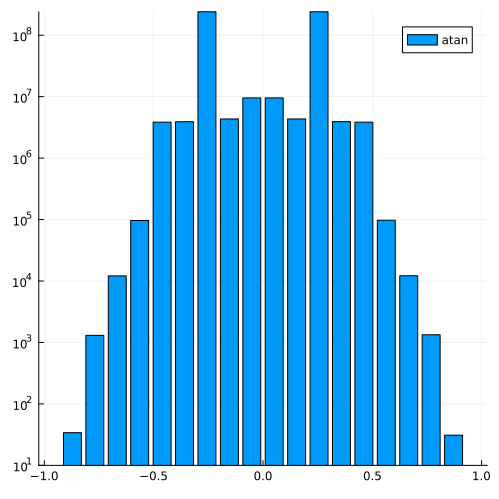

In [236]:
lupa = 12:29 
bar(r[lupa], RFD[8].buckets[lupa], yscale=:log10, yticks=exp10.(1:9), size=(500,500), label="atan")
savefig("atan_RFD")
bar(r[lupa], RFD[8].buckets[lupa], yscale=:log10, yticks=exp10.(1:9), size=(500,500), label="atan")

### Peores casos
Primero analizaremos los peores casos en cuestion de los casos un mayor porcetaje de números mal redondeodedos.
En segundo lugar vamos a analizar las funciones con peores errores maximos.

In [12]:
for peorFoo in sort(RFD, rev=true, by=x->sum(x.buckets[1:15]) + sum(x.buckets[26:40]))
    incorrectos = sum(peorFoo.buckets[1:15]) + sum(peorFoo.buckets[26:40])
    ulp2 = sum(peorFoo.buckets[1:5]) + sum(peorFoo.buckets[36:40])
    p = incorrectos/peorFoo.batchsize

    println("De $(peorFoo.f)")
    @printf("%2.2f%% de los casos estan mal por al menos 1 ulp \n", incorrectos/peorFoo.batchsize*100)
    @printf("%2.6f%% de los casos estan mal por al menos 2 ulp \n", ulp2/peorFoo.batchsize*100)
end

De acosh
19.14% de los casos estan mal por al menos 1 ulp 
0.000017% de los casos estan mal por al menos 2 ulp 
De cot
14.04% de los casos estan mal por al menos 1 ulp 
0.000613% de los casos estan mal por al menos 2 ulp 
De csc
11.47% de los casos estan mal por al menos 1 ulp 
0.000164% de los casos estan mal por al menos 2 ulp 
De sec
11.41% de los casos estan mal por al menos 1 ulp 
0.000167% de los casos estan mal por al menos 2 ulp 
De asinh
9.90% de los casos estan mal por al menos 1 ulp 
0.000000% de los casos estan mal por al menos 2 ulp 
De tan
1.88% de los casos estan mal por al menos 1 ulp 
0.000000% de los casos estan mal por al menos 2 ulp 
De sin
1.58% de los casos estan mal por al menos 1 ulp 
0.000000% de los casos estan mal por al menos 2 ulp 
De cos
1.58% de los casos estan mal por al menos 1 ulp 
0.000000% de los casos estan mal por al menos 2 ulp 
De atanh
1.31% de los casos estan mal por al menos 1 ulp 
0.000448% de los casos estan mal por al menos 2 ulp 
De tanh
0

In [133]:
for peorFoo in first(sort(RFD, rev=true, by=x->sum(x.buckets[1:15]) + sum(x.buckets[26:40])), 5)
    incorrectos = sum(peorFoo.buckets[1:15]) + sum(peorFoo.buckets[26:40])
    ulp2 = sum(peorFoo.buckets[1:5]) + sum(peorFoo.buckets[36:40])
    p = incorrectos/peorFoo.batchsize

    println("De $(peorFoo.f)")
    @printf("%2.4f%% de los casos estan mal por al menos 1 ulp \n", incorrectos/peorFoo.batchsize*100)
    @printf("%2.4f%% de los casos estan mal por al menos 2 ulp \n", ulp2/peorFoo.batchsize*100)
end


De acosh
19.1439% de los casos estan mal por al menos 1 ulp 
0.0000% de los casos estan mal por al menos 2 ulp 
De cot
14.0448% de los casos estan mal por al menos 1 ulp 
0.0006% de los casos estan mal por al menos 2 ulp 
De csc
11.4682% de los casos estan mal por al menos 1 ulp 
0.0002% de los casos estan mal por al menos 2 ulp 
De sec
11.4111% de los casos estan mal por al menos 1 ulp 
0.0002% de los casos estan mal por al menos 2 ulp 
De asinh
9.9005% de los casos estan mal por al menos 1 ulp 
0.0000% de los casos estan mal por al menos 2 ulp 


In [ ]:
for peorFoo in first(sort(RFD, rev=true, by=x->abs(x.maxError.err)), 5)
    incorrectos = sum(peorFoo.buckets[1:15]) + sum(peorFoo.buckets[26:40])
    p = incorrectos/peorFoo.batchsize
        println(peorFoo.f)
        println(incorrectos/peorFoo.batchsize)
end

## Sección Gamma

In [33]:
γ = JSON.parsefile("Float64Errors_GammaSection.json")
γ = Unmarshal.unmarshal(Array{TestsResults}, γ)
nothing

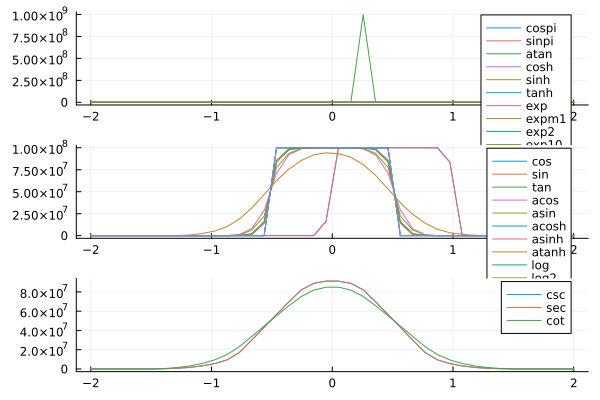

In [91]:
correct = filterResults(γ, prevfloat(0.0), 0.5)
ulp1 = filterResults(γ, 0.5, 1.5)
ulp2 = filterResults(γ, 1.5, 2.5)
r =  range(-2, 2, length=40)
l = @layout [a ; b ; c]
p1 = plot(r, setupBuckets(correct), label=setupLabels(correct))
p2 = plot(r, setupBuckets(ulp1), label=setupLabels(ulp1))
p3 = plot(r, setupBuckets(ulp2), label=setupLabels(ulp2))
plot(p1, p2, p3, layout = l)

In [40]:
1.3 ∈ 1:1.4

false

"∈" can be typed by \in<tab>

search: ∈



```
in(collection)
∈(collection)
```

Create a function that checks whether its argument is [`in`](@ref) `collection`, i.e. a function equivalent to `y -> y in collection`. See also [`insorted`](@ref) for use with sorted collections.

The returned function is of type `Base.Fix2{typeof(in)}`, which can be used to implement specialized methods.

---

```
in(item, collection) -> Bool
∈(item, collection) -> Bool
```

Determine whether an item is in the given collection, in the sense that it is [`==`](@ref) to one of the values generated by iterating over the collection. Returns a `Bool` value, except if `item` is [`missing`](@ref) or `collection` contains `missing` but not `item`, in which case `missing` is returned ([three-valued logic](https://en.wikipedia.org/wiki/Three-valued_logic), matching the behavior of [`any`](@ref) and [`==`](@ref)).

Some collections follow a slightly different definition. For example, [`Set`](@ref)s check whether the item [`isequal`](@ref) to one of the elements; [`Dict`](@ref)s look for `key=>value` pairs, and the `key` is compared using [`isequal`](@ref).

To test for the presence of a key in a dictionary, use [`haskey`](@ref) or `k in keys(dict)`. For the collections mentioned above, the result is always a `Bool`.

When broadcasting with `in.(items, collection)` or `items .∈ collection`, both `item` and `collection` are broadcasted over, which is often not what is intended. For example, if both arguments are vectors (and the dimensions match), the result is a vector indicating whether each value in collection `items` is `in` the value at the corresponding position in `collection`. To get a vector indicating whether each value in `items` is in `collection`, wrap `collection` in a tuple or a `Ref` like this: `in.(items, Ref(collection))` or `items .∈ Ref(collection)`.

See also: [`∉`](@ref).

# Examples

```jldoctest
julia> a = 1:3:20
1:3:19

julia> 4 in a
true

julia> 5 in a
false

julia> missing in [1, 2]
missing

julia> 1 in [2, missing]
missing

julia> 1 in [1, missing]
true

julia> missing in Set([1, 2])
false

julia> (1=>missing) in Dict(1=>10, 2=>20)
missing

julia> [1, 2] .∈ [2, 3]
2-element BitVector:
 0
 0

julia> [1, 2] .∈ ([2, 3],)
2-element BitVector:
 0
 1
```

See also: [`insorted`](@ref), [`contains`](@ref), [`occursin`](@ref), [`issubset`](@ref).

---

```
in(p, sc)
```

Returns true if `p` is in `sc`. In the case that `sc` is a SortedDict or SortedMultiDict, `p` is a key=>value pair. In the case that `sc` is a SortedSet, `p` should be a key. Time: O(*c* log *n* + *d*) for SortedDict and SortedSet, where *d* stands for the time to compare two values. In the case of SortedMultiDict, the time is O(*c* log *n* + *dl*), and *l* stands for the number of entries that have the key of the given pair. (So therefore this call is inefficient if the same key addresses a large number of values, and an alternative should be considered.)

---

```
in(p, sc)
```

Returns true if `p` is in `sc`. In the case that `sc` is a SortedDict or SortedMultiDict, `p` is a key=>value pair. In the case that `sc` is a SortedSet, `p` should be a key. Time: O(*c* log *n* + *d*) for SortedDict and SortedSet, where *d* stands for the time to compare two values. In the case of SortedMultiDict, the time is O(*c* log *n* + *dl*), and *l* stands for the number of entries that have the key of the given pair. (So therefore this call is inefficient if the same key addresses a large number of values, and an alternative should be considered.)


In [13]:
613/17

36.05882352941177